# Data Analist


> This is block for test

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py


### Importing csv file

In [ ]:
data = pd.read_excel('multiPages.xlsx')

In [ ]:
# data.head()

## Feature Enginering

### Which year made the most top rated anime

This is for ALL data

In [ ]:
years = np.arange(197,203,1).tolist()

for year in years:
    patternY = str(year)

    yearMask = data['AirDate'].str.contains(patternY)
    anime_Year = (data[yearMask])

    print('Top animes in decade', patternY, '\b0 :' , len(anime_Year))

In [ ]:
infoMonth = []
# If not like this, its sorted alphabeticly[Apr-Sep]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']

for month in months:
    patternM = (month)
    monthMask = data['AirDate'].str.contains(patternM)
    anime_Month = (data[monthMask])

    print('Number animes in', patternM,' :' ,len(anime_Month))
    # print(strMonth)
    infoMonth.append(anime_Month)   ## To find the dataframe acc. to month index

# (list(multiPage.AirDate.groupby(multiPage.AirDate.dt.year)))


---
------
## Only TV shows

### Clean-up
<!-- > test -->

In [ ]:
dataTV = data.loc[data.Type == 'TV'].copy()

In [ ]:
dataTV.columns

Formatting

In [ ]:
# cols_org = ['Rank', 'Title', 'Rating', 'Type', 'AirDate', 'EndDate', 'TotalEpi',
#        'Members', 'MAL Ref', 'Status', 'Premiered', 'Broadcast', 'Studio',
#        'Duration', 'Age Ratingn', 'Genres', 'Producer', 'Source']



dataTV['AirDate_dt'] = pd.to_datetime(dataTV.AirDate, infer_datetime_format=True)
dataTV['EndDate_dt'] = pd.to_datetime(dataTV.EndDate, infer_datetime_format=True)


### ---Dropping unneeded coloms
# dataTV = dataTV.drop(columns=['AirDate', 'EndDate'])

## Reorganizing coloms
dataTV = dataTV[['Rank', 'Title', 'Rating', 'Type', 'AirDate_dt', 'EndDate_dt', 'TotalEpi',
                'Members', 'MAL Ref', 'Status', 'Premiered', 'Broadcast', 'Studio',
                'Duration', 'Age Ratingn', 'Genres', 'Producer', 'Demograph', 'Themes',
                'Source']]



In [ ]:
# dataTV.info()

--------
------
### Released Stas

-----
#### Monthl released
AirDates

In [ ]:
# dataTV.AirDate_dt.astype('datetime64[ns]')
# dataTV.AirDate_dt.dt.month_name().value_counts().sort_index()

In [ ]:
monthCount = dataTV.AirDate_dt.dt.month.value_counts().sort_index()

j=0
for i in monthCount:
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']
    print(f'Number anmies in {months[j]} : {i}')
    j=j+1


monthCount.plot(kind='bar',
                xlabel='Months', 
                ylabel='Counts',
            
                title='Months the top 500 animes were released',
                color = 'blue',
                # rot=90 ##Rotate x value names,
                figsize=(15,5)
                  )

# dataTV.AirDate_dt.dt.year.value_counts().sort_index()

In [5]:
dataTV['Aired_months'] = dataTV.AirDate_dt.dt.month

<Axes: xlabel='Aired_months'>

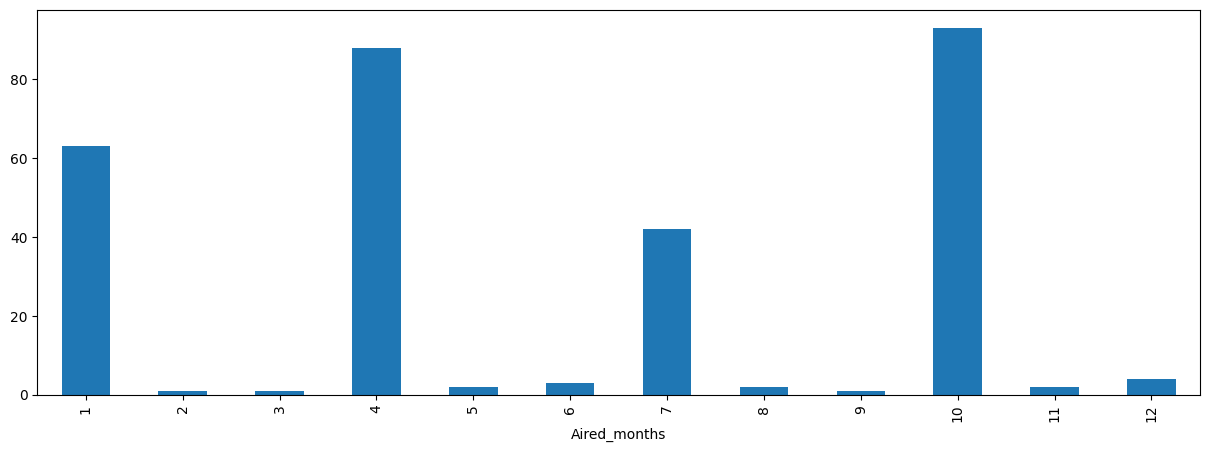

In [7]:
dataTV.groupby('Aired_months')['Aired_months'].count().plot.bar(figsize = (15,5))

In [ ]:
# py.plot(kind='bar',
#         data_frame=monthCount      
#         )

##### Can Delete This

In [ ]:
# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']

# monthsCounts = dataTV.AirDate.str.split(' ').str[0].value_counts()

# for i in months:
#     print(f'Number anmies in {i} : {monthsCounts[i]}')


# #--------------------

# monthsCounts[months].plot(kind='bar',
#                           xlabel='Months', 
#                           ylabel='Counts',
#                           title='Months the top 500 animes were released',
#                           color = 'blue',
#                         # rot=90 ##Rotate x value names,
#                         figsize=(15,5)
#                           )


As we can see from the graph and and printed data, most top animes was released in year quaters.

----
####  Seasonly released

Premiered

In [8]:
dataTV['Premiered_Season'] =dataTV.Premiered.str.split(' ').str[0]

Text(0.5, 1.0, 'Seasonly Releases')

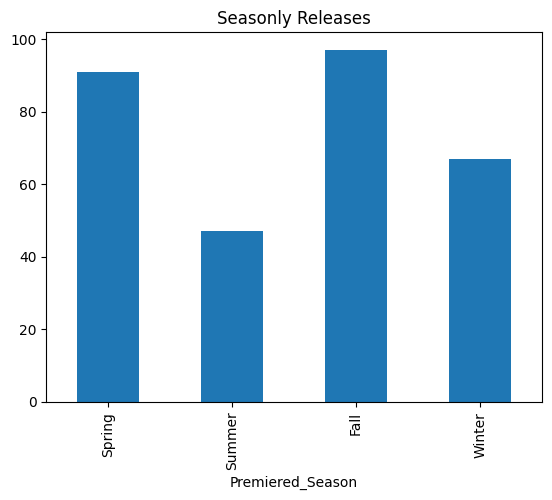

In [9]:
seasonGroup = dataTV.groupby('Premiered_Season')
season_count = seasonGroup['Premiered_Season'].count()

season_count = season_count.reindex(['Spring', 'Summer', 'Fall', 'Winter'])

ax = season_count.plot.bar()
ax.set_title('Seasonly Releases')

##### Other Season Count graph


In [ ]:
# ### USE THIS WAY FROM NOW

# seasonsNew = dataTV.Premiered.str.split(' ').str[0].value_counts()

# print('Number animes in Fall:   ', seasonsNew[0])
# print('Number animes in Spring: ', seasonsNew[1])
# print('Number animes in Winter: ', seasonsNew[2])
# print('Number animes in Summer: ', seasonsNew[3])


# plt.barh(['Spring', 'Summer', 'Fall', 'Winter'], seasonsNew)
# plt.title('Amount of top animes for each Season')
# plt.ylabel('Total top animes released')

In [ ]:
grouped = dataTV.groupby(['Premiered_Season', 'Broadcast'])

# grouped.count()

----
#### Yearly released for decade

Decades devide for each release

<!-- <br> - decades_data = dataTV.groupby((dataTV.AirDate_dt.dt.year//10)*10) -->


In [ ]:
decade = (dataTV.groupby(dataTV.AirDate_dt.dt.year//10)).count()
decade.index.name ='decades'

decade = decade.reset_index().assign(decades=decade.index*10).rename(columns={'AirDate_dt':'counts'})
decade = decade.rename(columns={'AirDate_dt':'Counts'})

# decade

ax =  decade.plot.bar(x='decades', 
                      y='counts',
                      grid = False
                    )
ax.set_ylabel('Counts')
ax.set_title('Top TV released per decade')

In [ ]:
decade

-------
*******
### Ratings Stats

##### Seasonal Rating

In [ ]:
seasonal_rating = dataTV.groupby('Premiered_Season')['Rating']

seasonal_rating_avr = seasonal_rating.mean().round(2)

ax = seasonal_rating_avr.plot.barh()
ax.set_xlim(7,9)
ax.set_title('Average ratings per Season')
ax.set_ylabel(None)
ax.set_xlabel('Rating avr')


##### Monthly Ratings

In [ ]:
month_rating = dataTV.groupby('Aired_months')['Rating']
month_rating_mean = month_rating.mean()


# Creating and modifing plot
ax = month_rating_mean.plot.bar()
ax.set_xlabel(months)
ax.set_ylim(7,9)


month_rating_mean = month_rating_mean.reset_index()


In [ ]:
# month_rating_mean.Aired_months

# month_rating_mean

In [ ]:
month_rating.get_group(2)

#### Yearly ratings

In [ ]:
decades_data = dataTV.groupby((dataTV.AirDate_dt.dt.year//10)*10)

ax = decades_data['Rating'].mean().plot.barh()
ax.set_xlim(7,10)


In [ ]:
# dataTV.groupby(da)

In [ ]:
decade

-------
*******
### Broadcasts Stats

In [ ]:
newDay = (dataTV.Broadcast[:5]).str[:-1]

# pd.to_datetime(newDay, infer_datetime_format=True)

newDay

In [ ]:
broadcast_group = dataTV.groupby(dataTV.Broadcast)

#### Wekkly released counts

In [ ]:
## Each weekday count
broadcast_count = broadcast_group['Broadcast'].count()

#Drop elements
broadcast_count = broadcast_count.drop(['Not scheduled once per week\n', 'Unknown\n'])

# Reorder elements
broadcast_count = broadcast_count.reindex(['Mondays', 'Tuesdays', 'Wednesdays', 'Thursdays', 'Fridays', 'Saturdays', 'Sundays'])

In [ ]:
ax = broadcast_count.plot.bar()
ax.set_title('Weekly releases')
ax.set_ylabel('Counts')

#### Seasonly

In [ ]:
# %config InlineBackend.figure_format = 'retina'

# broadcast_group['Premiered_Season'].describe()
broadcast_group['Premiered_Season'].value_counts().plot.bar(figsize = (15,5))

In [ ]:
date_order = ['Mondays', 'Tuesdays', 'Wednesdays', 'Thursdays', 'Fridays', 'Saturdays', 'Sundays']

ax = sns.catplot(x= 'Broadcast',
               data = dataTV,
                kind = 'count',
                order= date_order,                
            )


In [ ]:
# sns.catplot(data = dataTV,
#             x = 'Premiered_Season',
#             col = 'Premiered_Season',
#             y='Broadcast',
#             kind = 'count')


sns.catplot( x = season_count,
            y = broadcast_count
            )

In [ ]:
## Airing Days

dataTV.Broadcast.value_counts()

-----
-----
### Studios Stats

In [ ]:
dataTV.Studio.value_counts()

--------
------
### Age Ratings

Text(0.5, 1.0, 'Age Rating Counts')

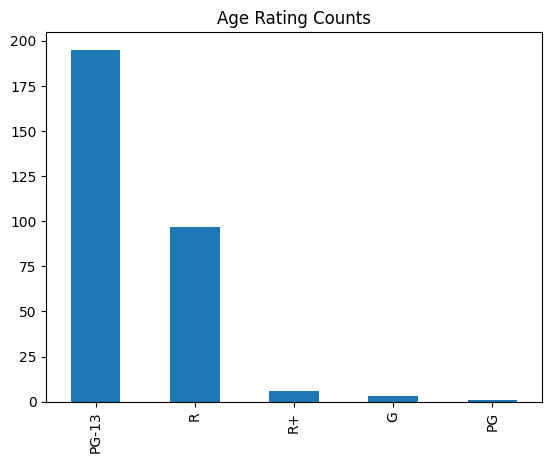

In [10]:
dataTV['Age Ratingn'].value_counts().plot.bar()

plt.title('Age Rating Counts')
# plt.grid()

In [11]:
dataTV['Age Ratingn'].value_counts()

PG-13    195
R         97
R+         6
G          3
PG         1
Name: Age Ratingn, dtype: int64

In [15]:
# dataTV.groupby('Age Ratingn').count()


-----
----
### Generes

Fix after running other code again

In [16]:
genreNames = ['Action', 'Adventure', 'Avant Garde', 'Award Winning','Boys Love', 'Comedy', 
              'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance',
              'Sci-Fi', 'Slice of Life ', 'Sports', 'Supernatural', 'Suspense ']

In [139]:
len(genreNames)

18

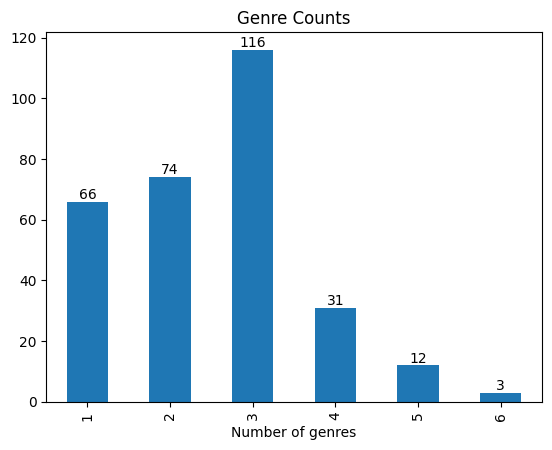

In [48]:
genreList = ((dataTV.Genres).str.split("'").str[1::2])

ax = genreList.str.len().value_counts().sort_index().plot.bar(legend = False)
ax.set_title('Genre Counts')
ax.set_xlabel('Number of genres')
# ax.grid('on', axis = 'y' )
# ax.bar_label(ax.containers[1])

# ax.xl

for container in ax.containers:
    ax.bar_label(container)

In [144]:
first = genreList[1]


# first.count(genreNames[0])
first.count('Action')

1

In [108]:
# genreList = genreList.reset_index()
genreNames

['Action',
 'Adventure',
 'Avant Garde',
 'Award Winning',
 'Boys Love',
 'Comedy',
 'Drama',
 'Fantasy',
 'Girls Love',
 'Gourmet',
 'Horror',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Slice of Life ',
 'Sports',
 'Supernatural',
 'Suspense ']

In [133]:
actionList = []
adventureList = []
awardWList = []
avantGrandeList = []

lenList = []

# for index, value in enumerate(genreNames):
for index, value in enumerate(genreList):
    # print(index,str(value))

    action_Sum      = (str(value.__contains__(genreNames[0]))).count('True')
    adventure_Sum   = (str(value.__contains__(genreNames[1]))).count('True')
    avantGarde_Sum  = (str(value.__contains__(genreNames[2]))).count('True')
    awardW_Sum      = (str(value.__contains__(genreNames[3]))).count('True')



    (actionList.append(action_Sum))
    (adventureList.append(adventure_Sum))
    (avantGrandeList.append(avantGarde_Sum))
    (awardWList.append(awardW_Sum))


    lenList.append([actionList.count, adventureList])

    # print('test', comedySum)  


print(genreNames[0],'\t len:',sum(actionList))
print(genreNames[1],'\t len:',sum(adventureList))
print(genreNames[2],'\t len:',sum(avantGrandeList))
print(genreNames[3],'\t len:',sum(awardWList))


print('Testing len:', (lenList[0]))

Action 	 len: 110
Adventure 	 len: 59
Avant Garde 	 len: 2
Award Winning 	 len: 24
Testing len: [<built-in method count of list object at 0x000002789D6C5C80>, [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 

In [252]:
testlist =[]

# genreNames = genreNames
for i in genreList:

    for j in dataTV.Genres:

        test = j.__contains__(str(i))
    
        # testlist.append(test)

        # test = (j.__contains__(i))
    
        print(test)


# print((testlist))


True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

In [138]:
# dataTV['Action_TF'] = str(genreList.values[2])

# dataTV.Action_TF


# dataTV.groupby(['Themes'][0])['Themes'].count()


Themes
['Adult Cast', 'Detective', 'Mecha', 'Military']                        2
['Adult Cast', 'Detective', 'Psychological']                            1
['Adult Cast', 'High Stakes Game', 'Psychological', 'Strategy Game']    2
['Adult Cast', 'High Stakes Game', 'Psychological']                     1
['Adult Cast', 'Historical', 'Iyashikei']                               3
                                                                       ..
['Survival', 'Time Travel']                                             2
['Team Sports']                                                         8
['Time Travel']                                                         2
['Vampire']                                                             4
[]                                                                      1
Name: Themes, Length: 123, dtype: int64

In [107]:
(genreList.values[2]).__contains__('Suspense')

True

In [ ]:
# list(genreList.items())

genreList[1].count('Action' or 'Drama' or 'Romance')

----
-----
### Producers

In [ ]:
dataTV.Producer.value_counts()[:20].plot(kind='bar', figsize=(15,5), grid=True)

------
------
### Source

In [ ]:
dataTV.Source.value_counts().plot(kind='bar')

-----
------
### Demograph

In [ ]:
uniqueDemo = ['Josei', 'Kids', 'Seinen', 'Shoujo', 'Shounen'] 

In [ ]:
demograph_group = dataTV.groupby(dataTV['Demograph'])

In [ ]:
demograph_count = demograph_group['Demograph'].count()

demograph_count

In [ ]:
ax = demograph_count.plot.bar()
ax.set_title('Demograph type counts')
ax.set_ylabel('Count')

----
------
### Themes

In [ ]:
uniqueThemes = ['Adult Cast ','Anthropomorphic',  'CGDCT ', 'Childcare ', 'Combat Sports ', 'Crossdressing ',
                 'Delinquents ', 'Detective ', 'Educational ', 'Gag Humor ', 'Gore ', 'Harem ', 'High Stakes Game ', 
                 'Historical ', 'Idols (Female) ', 'Idols (Male) ', 'Isekai ', 'Iyashikei ', 'Love Polygon ', 
                 'Magical Sex Shift ', 'Mahou Shoujo ', 'Martial Arts ', 'Mecha ', 'Medical ', 'Military ', 'Music ',
                 'Mythology ', 'Organized Crime ', 'Otaku Culture ', 'Parody ', 'Performing Arts ', 'Pets ', 'Psychological ',
                  'Racing ', 'Reincarnation ', 'Reverse Harem ', 'Romantic Subtex ', 'Samurai ', 'School ', 'Showbiz ', 
                  'Space ', 'Strategy Game ', 'Super Power ', 'Survival ', 'Team Sports ', 'Time Travel ', 'Vampire ', 
                  'Video Game ', 'Visual Arts ', 'Workplace ']

In [ ]:
len(uniqueThemes)

In [ ]:
(dataTV.Themes[3])



In [ ]:
# dataTV['themeList'] = ((dataTV.Themes).str.split("'"))

dataTV['themeList'] = ((dataTV.Themes).str.split("'").str[1::2])

# counts number of indexes
# dataTV.themeList.str.len()


# # Counts number cointaining certain number of themes
# # 121 entries have 1 themes
# # 101 enreies have 2 themes
# # 63 enreies have 3 themes
# # 16 enreies have 4 themes

((dataTV.Themes).str.split("'").str[1::2]).str.len().value_counts()


In [ ]:
# ((dataTV.Themes[8]).split("'")[1::2])

((dataTV.themeList)).sort_values()

In [ ]:
# themes_group = dataTV.groupby(dataTV['Themes'])   ## The original colom
themes_group = dataTV.groupby(dataTV['themeList'])

In [ ]:
themes_group

In [ ]:
# (dataTV.themeList)[:5].value_counts()
(dataTV.themeList).loc[:5]

In [ ]:
# Counts each adult cast occurance
dataTV.Themes.str.count('Adult Cast').sum()
dataTV.Themes.str.count('Childcare').sum()



In [ ]:
((dataTV.Themes).str.split("'").str[1::2]).str

----
-----
----
## Only Movies

In [ ]:
data.loc[data.Type == 'Movie']
